<a href="https://colab.research.google.com/github/legendary-idiot/ARIMA_Model/blob/main/AQI_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install Prophet and Dependencies**

In [ ]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# **2. Data Import and Visualize**

In [3]:
df = pd.read_csv('/content/AQI_Data/AQI.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1095 non-null   object
 1   AQI     1095 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [4]:
df.head()

,Date,AQI
0,"January 1, 2021",153
1,"January 2, 2021",166
2,"January 3, 2021",161
3,"January 4, 2021",157
4,"January 5, 2021",129


In [5]:
df.tail()

,Date,AQI
1090,"December 27, 2023",216
1091,"December 28, 2023",250
1092,"December 29, 2023",183
1093,"December 30, 2023",150
1094,"December 31, 2023",173


# **3. Select Data to Predict**

In [6]:
df=df[["Date","AQI"]]
df.head()

,Date,AQI
0,"January 1, 2021",153
1,"January 2, 2021",166
2,"January 3, 2021",161
3,"January 4, 2021",157
4,"January 5, 2021",129


**Change Column Names for FBProphet**

In [7]:
df.columns = ['ds','y']

**Convert Date Format to YY-MM-DD**

In [8]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1090,2023-12-27,216
1091,2023-12-28,250
1092,2023-12-29,183
1093,2023-12-30,150
1094,2023-12-31,173


# **4. Start Making Predictions**

In [10]:
m = Prophet(daily_seasonality=True)
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphd0fwhgs/vitvkrpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphd0fwhgs/asagn5sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71484', 'data', 'file=/tmp/tmphd0fwhgs/vitvkrpp.json', 'init=/tmp/tmphd0fwhgs/asagn5sd.json', 'output', 'file=/tmp/tmphd0fwhgs/prophet_modelsuw9pi5p/prophet_model-20240419064655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:46:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Predictions for 1 Year (365 Days)**

In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1455,2024-12-26
1456,2024-12-27
1457,2024-12-28
1458,2024-12-29
1459,2024-12-30


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1455,2024-12-26,174.307895,132.214745,216.060509
1456,2024-12-27,172.292211,132.007598,211.563810
1457,2024-12-28,171.232969,132.730418,212.978574
1458,2024-12-29,170.686443,128.209238,214.207781
1459,2024-12-30,171.707146,130.882834,215.299384


# **5. Plot the Predicted Data**

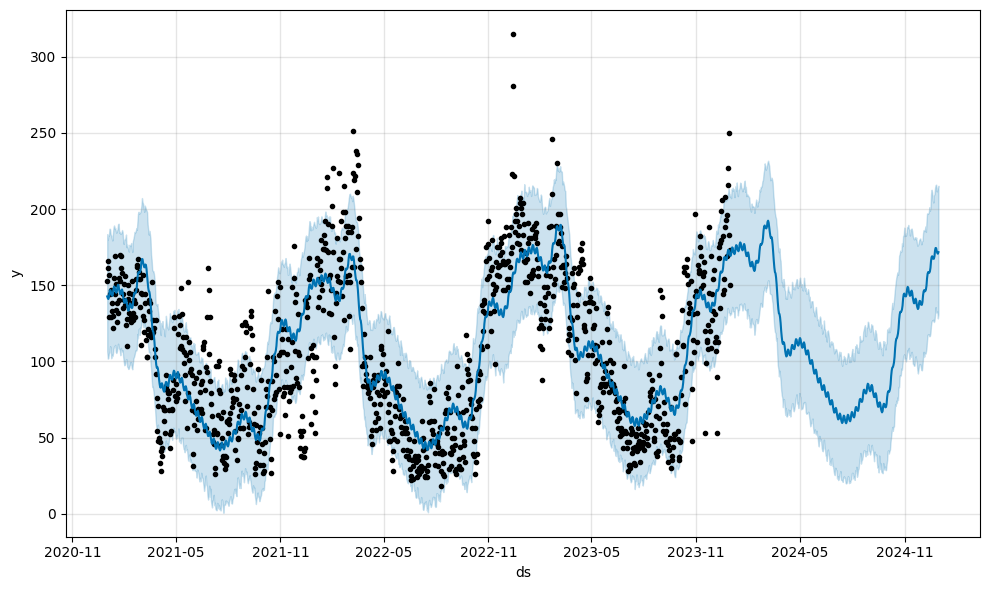

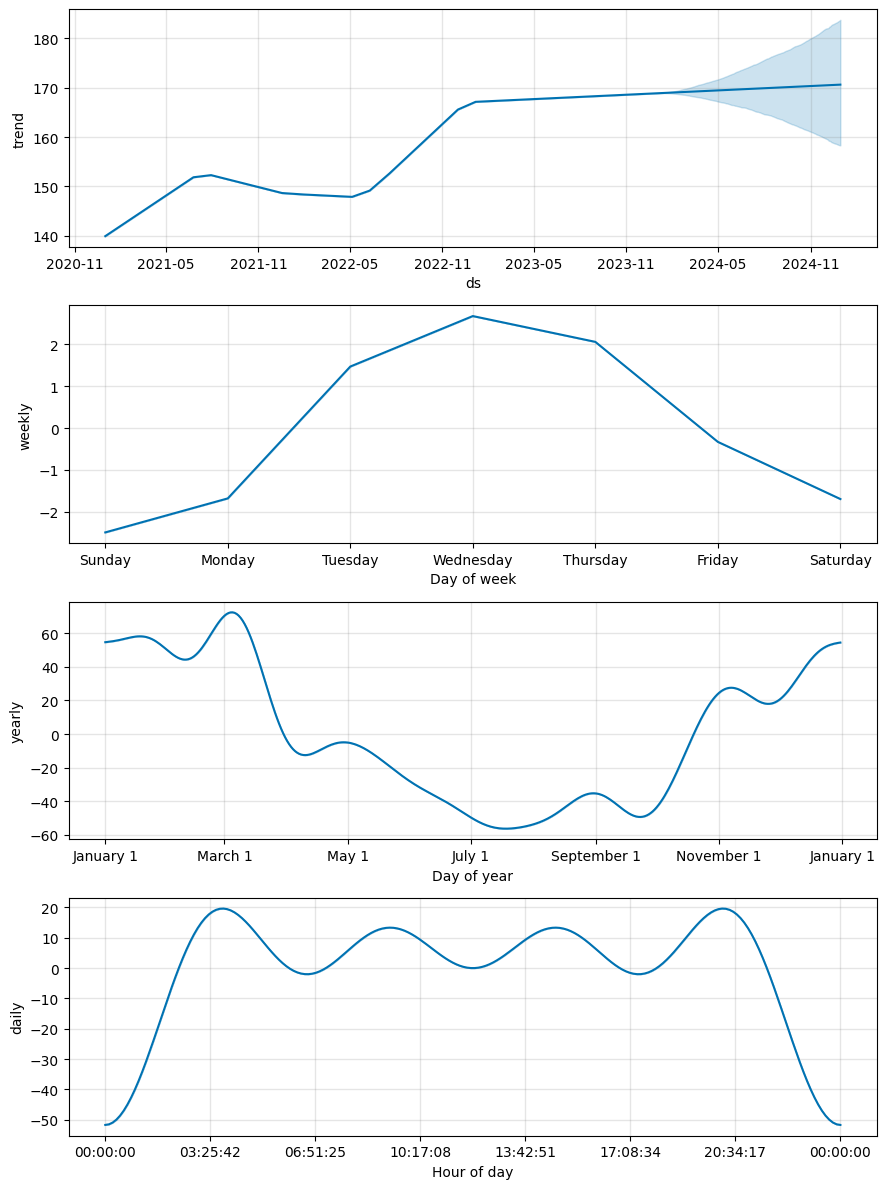

In [13]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

**Interactive Plot**

In [14]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# **6. Export the Predicted Data**

In [15]:
export = forecast[["ds", "yhat"]]
export.tail()

,ds,yhat
1455,2024-12-26,174.307895
1456,2024-12-27,172.292211
1457,2024-12-28,171.232969
1458,2024-12-29,170.686443
1459,2024-12-30,171.707146


In [17]:
export.to_csv('/content/AQI_Data/Predicted_AQI.csv')